In [17]:
import cvxpy as cp
import matplotlib.pyplot as plt

In [18]:
from dataset import *

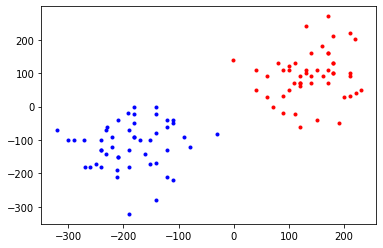

In [19]:
# plot the input data points
plt.plot(X[0,:], X[1,:], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')
plt.show()

In [20]:
# concatenate input matrices and set up the optimization problem
lambdas = cp.Variable(shape=(100,))
M = np.concatenate((X, -Y), axis=1)
D = M.T @ M + np.eye(M.shape[1]) * 1e-5

In [23]:
# print relevant shapes and check that the matrix is positive semi-definite
print("Shape of D:", D.shape)
print("Shape of M:", M.shape)
print("Is D positive semi-definite?", np.all(np.linalg.eigvals(D) >= 0))

Shape of D: (100, 100)
Shape of M: (50, 100)
Is D positive semi-definite? True


In [25]:
# Set up the objective function and constraints for the optimization problem
objective = cp.Minimize(-cp.sum(lambdas) + 0.5 * cp.quad_form(M @ lambdas, np.eye(M.shape[0])))
constraints = [lambdas >= 0, cp.sum(lambdas[0:50] - lambdas[50:100]) == 0]
problem = cp.Problem(objective, constraints)

# Solve the optimization problem and print the value of the Lagrange multipliers
problem.solve(solver=cp.ECOS, verbose=False)
print("Value of Lagrange multipliers:", lambdas.value)

Value of Lagrange multipliers: [1.04981995e-10 1.84623650e-10 3.87322941e-09 1.86817297e-10
 1.37329101e-07 2.18902952e-10 1.02587101e-10 1.13608178e-10
 1.71491949e-10 1.41717904e-10 1.24916278e-10 1.68403241e-10
 2.08067773e-10 7.25539449e-09 1.72759545e-10 2.85727477e-10
 1.80146309e-10 1.37671106e-10 5.94213902e-10 1.43935700e-10
 2.01420784e-10 5.45904881e-09 1.78318810e-10 1.94011154e-10
 3.21406823e-10 2.39294240e-10 2.25500569e-10 6.12124061e-07
 3.03553721e-07 1.09152359e-10 1.86777662e-10 2.29975029e-07
 2.68998109e-10 2.24904278e-10 1.21133134e-10 2.59884383e-07
 3.78318216e-10 4.48642490e-10 4.90064091e-10 1.83106255e-10
 3.99086015e-10 1.25642864e-10 2.56546186e-10 7.33530502e-10
 9.60859795e-11 1.76796397e-10 2.61818192e-10 1.43231674e-10
 1.78299144e-10 1.49729128e-10 2.15839088e-10 1.96178394e-10
 1.66283398e-10 1.20955524e-09 3.31636604e-08 1.38611076e-09
 3.28560070e-10 6.35779629e-10 1.86120690e-10 2.24364193e-10
 3.93148754e-07 2.69344864e-10 8.90998814e-08 3.397255

In [26]:
# calculate the weight vector and bias term from the Lagrange multipliers
w = np.sum(np.multiply(lambdas.value,M), axis=1)
index = np.argmax(lambdas.value)
b = 1 - (w.T @ M[:,index])[0,0]

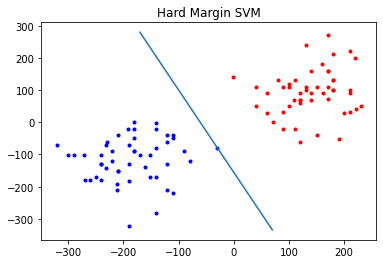

In [40]:
# plot the decision boundary and support vectors
i1 = 0
i2 = 1
plt.plot(X[i1,:], X[i2,:], 'r.')
plt.plot(Y[i1,:], Y[i2,:], 'b.')
x = np.linspace(-170, 70, 50)
y = -(w[i1, 0]*x + b)/w[i2, 0]
plt.plot(x, y)
plt.title('Hard Margin SVM')
plt.show()